# Exploratory Data Analysis

If graphs are not displayed properly, please visit the jupyter notebook in my github account [https://github.com/solegalli/DataScience-Portfolio](https://github.com/solegalli/DataScience-Portfolio/tree/master/AirlineSentimentAnalysis)

In [1]:
options(jupyter.plot_mimetypes = "image/png")

In [2]:
data = read.csv('../input/Tweets.csv')
dim(data)
str(data)

[1] 14640    15

'data.frame':	14640 obs. of  15 variables:
 $ tweet_id                    : num  5.7e+17 5.7e+17 5.7e+17 5.7e+17 5.7e+17 ...
 $ airline_sentiment           : Factor w/ 3 levels "negative","neutral",..: 2 3 2 1 1 1 3 2 3 3 ...
 $ airline_sentiment_confidence: num  1 0.349 0.684 1 1 ...
 $ negativereason              : Factor w/ 11 levels "","Bad Flight",..: 1 1 1 2 3 3 1 1 1 1 ...
 $ negativereason_confidence   : num  NA 0 NA 0.703 1 ...
 $ airline                     : Factor w/ 6 levels "American","Delta",..: 6 6 6 6 6 6 6 6 6 6 ...
 $ airline_sentiment_gold      : Factor w/ 4 levels "","negative",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ name                        : Factor w/ 7701 levels "___the___","__betrayal",..: 1073 3477 7666 3477 3477 3477 1392 5658 1874 7665 ...
 $ negativereason_gold         : Factor w/ 14 levels "","Bad Flight",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ retweet_count               : int  0 0 0 0 0 0 0 0 0 0 ...
 $ text                        : Factor w/ 14427 levels ",@USAirways 

The dataset contains 14640 tweets and 15 variables (columns).

## Proportion of tweets with each sentiment

In [3]:
prop.table(table(data$airline_sentiment))


 negative   neutral  positive 
0.6269126 0.2116803 0.1614071 

We see that most of the tweets contain negative sendiment, as labelled by the curators of the dataset.

In [4]:
# generate a dataframe for plotting in ggplot2
smallData = as.data.frame(prop.table(table(data$airline_sentiment)))
colnames(smallData) = c('Sentiment', 'Frequency')
smallData

Sentiment,Frequency
negative,0.6269126
neutral,0.2116803
positive,0.1614071


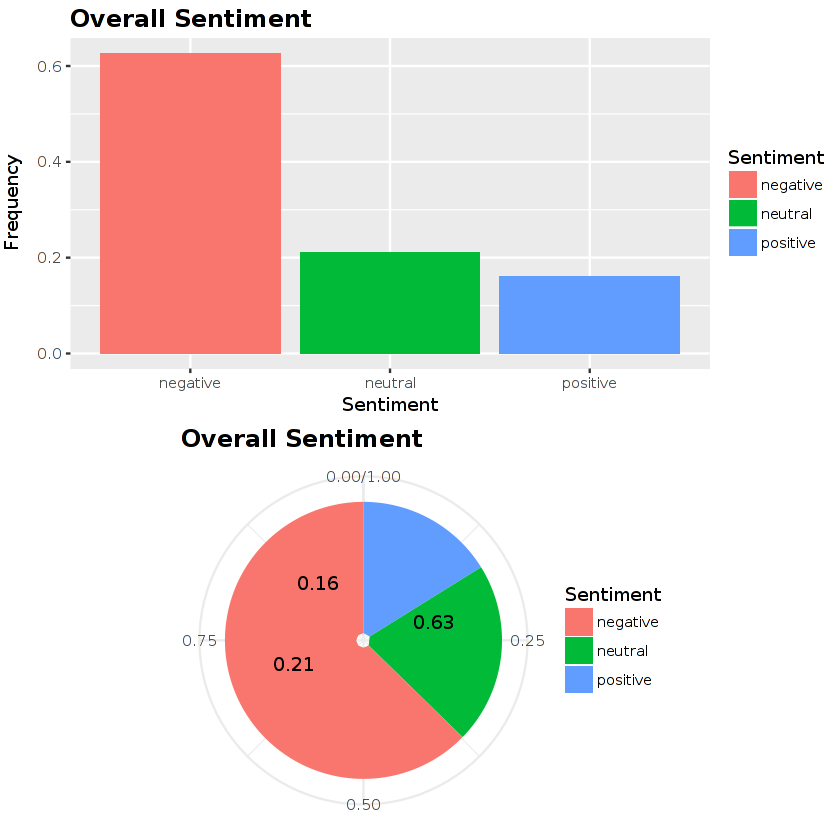

In [5]:
library(ggplot2)
library(gridExtra)

# create blank theme for pie chart, otherwise it looks awful in my opinion
blank_theme = theme_minimal() + theme(
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    panel.border = element_blank(),
    axis.ticks = element_blank(),
    plot.title = element_text(size = 14, face = 'bold') )

gbar = ggplot(smallData, aes(x = Sentiment, y = Frequency, fill = Sentiment))
gpie = ggplot(smallData, aes(x = "", y = Frequency, fill = Sentiment))

plot1 = gbar + geom_bar(stat = 'identity') + ggtitle("Overall Sentiment") + 
        theme(plot.title = element_text(size = 14, face = 'bold', vjust = 1),
              axis.title.y = element_text(vjust = 2), axis.title.x = element_text(vjust = -1))

plot2 = gpie + geom_bar(stat = 'identity') + coord_polar("y", start = 0) + blank_theme +
        theme(axis.title.x = element_blank()) + geom_text(aes(y = Frequency/3 + c(0, cumsum(Frequency)[-length(Frequency)]),
        label = round(Frequency, 2)), size = 4) + ggtitle('Overall Sentiment')

grid.arrange(plot1, plot2, ncol = 1, nrow = 2)

We can see from the bar plot and the pie that most tweets contain negative sentiment.

## Proportion of tweets per airline

In [6]:
prop.table(table(data$airline))


      American          Delta      Southwest         United     US Airways 
    0.18845628     0.15177596     0.16530055     0.26106557     0.19897541 
Virgin America 
    0.03442623 

In [7]:
# dataframe for plotting in ggplot
smallData = as.data.frame(prop.table(table(data$airline)))
colnames(smallData) = c('airline', 'Frequency')
smallData

airline,Frequency
American,0.18845628
Delta,0.15177596
Southwest,0.16530055
United,0.26106557
US Airways,0.19897541
Virgin America,0.03442623


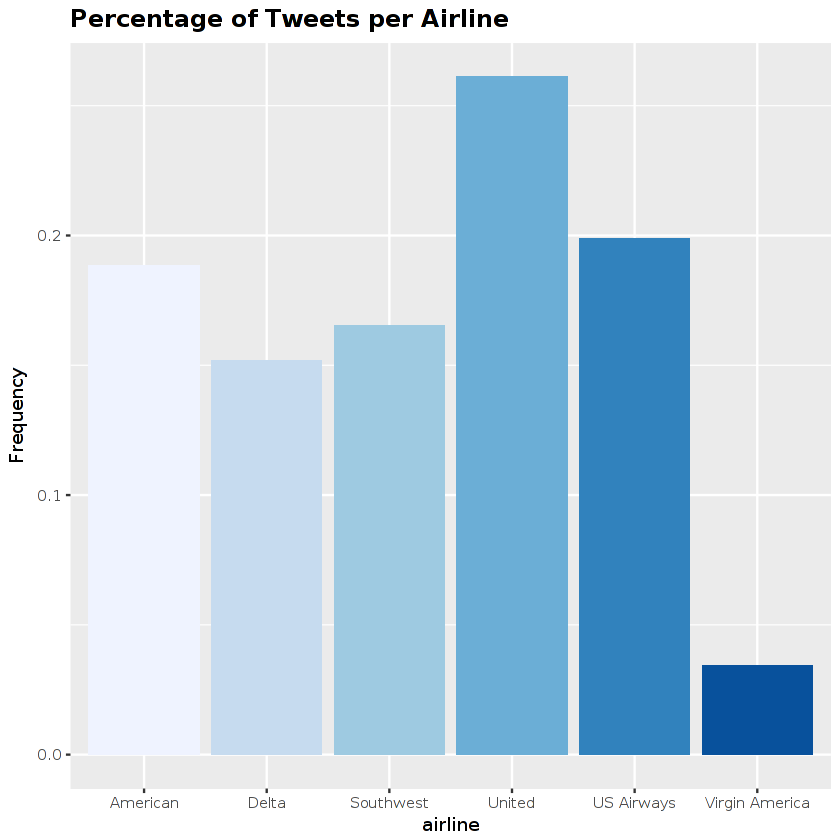

In [8]:
gbar = ggplot(smallData, aes(x = airline, y = Frequency, fill = airline))
gbar + geom_bar(stat = 'identity') + scale_fill_brewer() + ggtitle('Percentage of Tweets per Airline') +
guides(fill = FALSE) + theme(plot.title = element_text(size = 14, face = 'bold', vjust = 1))

Most of the tweets are directed towards United Airlines, followed by American and US Airways. Very few tweets are targeted towards Virgin America.

## Proportion of negative sentiment tweets per airline

In [9]:
prop.table(table(data$airline_sentiment, data$airline))

          
             American      Delta  Southwest     United US Airways
  negative 0.13387978 0.06523224 0.08101093 0.17984973 0.15457650
  neutral  0.03162568 0.04938525 0.04535519 0.04760929 0.02602459
  positive 0.02295082 0.03715847 0.03893443 0.03360656 0.01837432
          
           Virgin America
  negative     0.01236339
  neutral      0.01168033
  positive     0.01038251

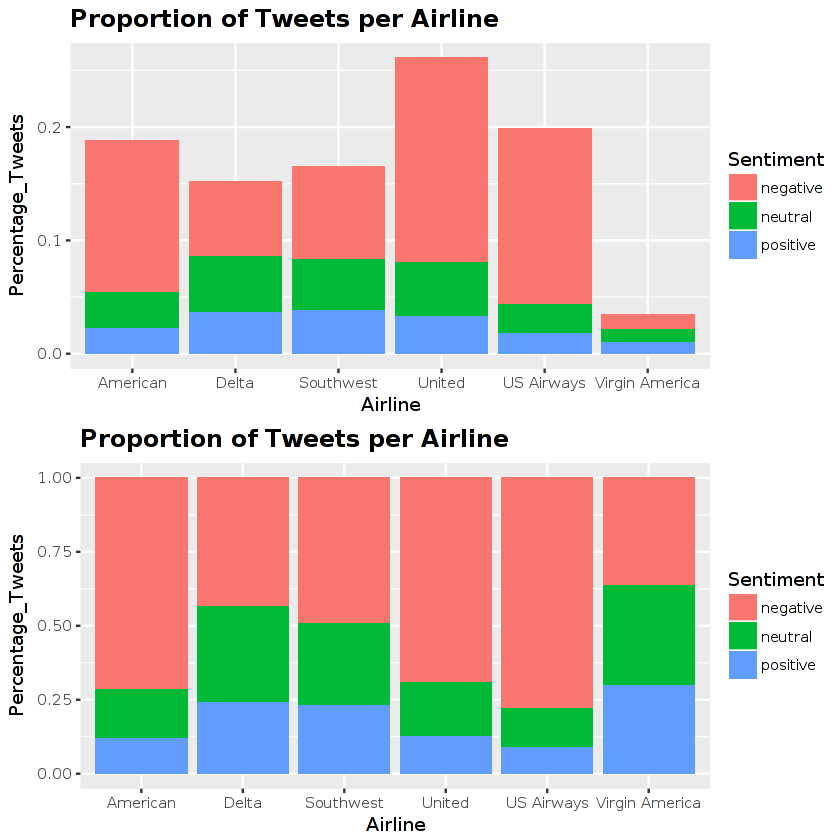

In [10]:
# dataframe for ggplot
smallData = as.data.frame(prop.table(table(data$airline_sentiment, data$airline)))
colnames(smallData) = c('Sentiment', 'Airline', 'Percentage_Tweets')

gbar = ggplot(smallData, aes(x = Airline, y = Percentage_Tweets, fill = Sentiment)) + ggtitle('Proportion of Tweets per Airline') +
theme(plot.title = element_text(size = 14, face = 'bold', vjust = 1), axis.title.x = element_text(vjust = -1))

plot1 = gbar + geom_bar(stat = 'identity')
plot2 = gbar + geom_bar(stat = 'identity', position = 'fill')

grid.arrange(plot1, plot2, ncol = 1, nrow = 2)

The second plot is more informative, in the sense that it allows as to see the proportion of negative sentiment tweets per airline. We see that American, United and US Airways directed tweets are mostly negative. On the contrary, tweets directed towards Delta, Southwest and Virgin contain a good proportion of neutral and positive sentiment tweets.

## Reasons for negative sentiment tweets

In [11]:
# dataframe for ggplot
smallData = as.data.frame(prop.table(table(data$negativereason)))
colnames(smallData) = c('Reason', 'Frequency')
smallData = smallData[-1, ] # remove first raw as it has no reason specified
smallData

,Reason,Frequency
2,Bad Flight,0.039617486
3,Can't Tell,0.081284153
4,Cancelled Flight,0.057855191
5,Customer Service Issue,0.198770492
6,Damaged Luggage,0.005054645
7,Flight Attendant Complaints,0.032855191
8,Flight Booking Problems,0.036133880
9,Late Flight,0.113729508
10,longlines,0.012158470
11,Lost Luggage,0.049453552


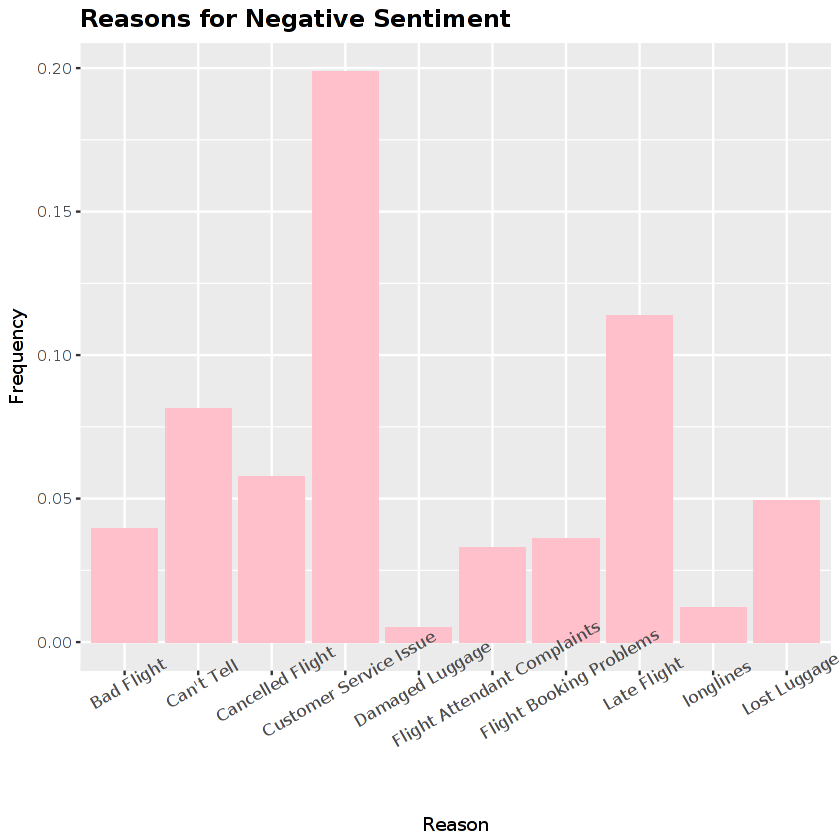

In [12]:
g = ggplot(smallData, aes(x = Reason, y = Frequency)) + geom_bar(stat = 'identity', fill = 'pink')
g = g + ggtitle('Reasons for Negative Sentiment')
g = g + theme(plot.title = element_text(size = 14, face = 'bold', vjust = 1), axis.title.x = element_text(vjust = -0.1),
              axis.text.x = element_text(angle = 30, size = 10, vjust = 1))
g

We see that negative sentiment is mostly elicited by Customer Service Issues (presumably bad customer service), followed by Late Flights.

## Reasons for negative sentiment per airline

In [13]:
American = subset(data, airline == 'American')
USAirways = subset(data, airline == 'US Airways')
Delta = subset(data, airline == 'Delta')
Southwest = subset(data, airline = 'Southwest')
Virgin = subset(data, airline = 'Southwest')
United = subset(data, airline = 'United')

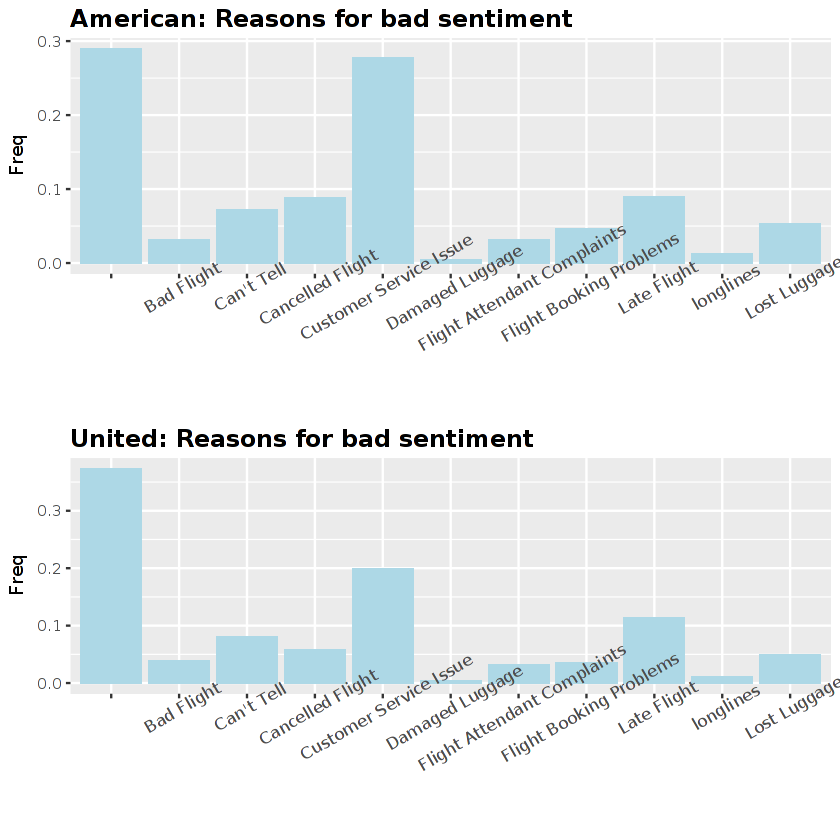

In [14]:
g1 = ggplot(as.data.frame(prop.table(table(American$negativereason))), aes(x = Var1, y = Freq)) +
geom_bar(stat = 'identity', fill = 'lightblue')
g1 = g1 + ggtitle('American: Reasons for bad sentiment')
g1 = g1 + theme(plot.title = element_text(size = 14, face = 'bold', vjust = 1), axis.title.x = element_blank(),
                axis.text.x = element_text(angle = 30, size = 10, vjust = 1))

g2 = ggplot(as.data.frame(prop.table(table(United$negativereason))), aes(x = Var1, y = Freq)) +
geom_bar(stat = 'identity', fill = 'lightblue')
g2 = g2 + ggtitle('United: Reasons for bad sentiment')
g2 = g2 + theme(plot.title = element_text(size = 14, face = 'bold', vjust = 1), axis.title.x = element_blank(),
                axis.text.x = element_text(angle = 30, size = 10, vjust = 1))

g3 = ggplot(as.data.frame(prop.table(table(USAirways$negativereason))), aes(x = Var1, y = Freq)) +
geom_bar(stat = 'identity', fill = 'lightblue')
g3 = g3 + ggtitle('US Airways: Reasons for bad sentiment')
g3 = g3 + theme(plot.title = element_text(size = 14, face = 'bold', vjust = 1), axis.title.x = element_blank(),
                axis.text.x = element_text(angle = 30, size = 10, vjust = 1))

g4 = ggplot(as.data.frame(prop.table(table(Delta$negativereason))), aes(x = Var1, y = Freq)) +
geom_bar(stat = 'identity', fill = 'lightblue')
g4 = g4 + ggtitle('Delta: Reasons for bad sentiment')
g4 = g4 + theme(plot.title = element_text(size = 14, face = 'bold', vjust = 1), axis.title.x = element_blank(),
                axis.text.x = element_text(angle = 30, size = 10, vjust = 1))

g5 = ggplot(as.data.frame(prop.table(table(Southwest$negativereason))), aes(x = Var1, y = Freq)) +
geom_bar(stat = 'identity', fill = 'lightblue')
g5 = g5 + ggtitle('Southwest: Reasons for bad sentiment')
g5 = g5 + theme(plot.title = element_text(size = 14, face = 'bold', vjust = 1), axis.title.x = element_blank(),
                axis.text.x = element_text(angle = 30, size = 10, vjust = 1))

g6 = ggplot(as.data.frame(prop.table(table(Virgin$negativereason))), aes(x = Var1, y = Freq)) +
geom_bar(stat = 'identity', fill = 'lightblue')
g6 = g6 + ggtitle('Virgin: Reasons for bad sentiment')
g6 = g6 + theme(plot.title = element_text(size = 14, face = 'bold', vjust = 1), axis.title.x = element_blank(),
                axis.text.x = element_text(angle = 30, size = 10, vjust = 1))

grid.arrange(g1, g2, ncol = 1, nrow = 2)

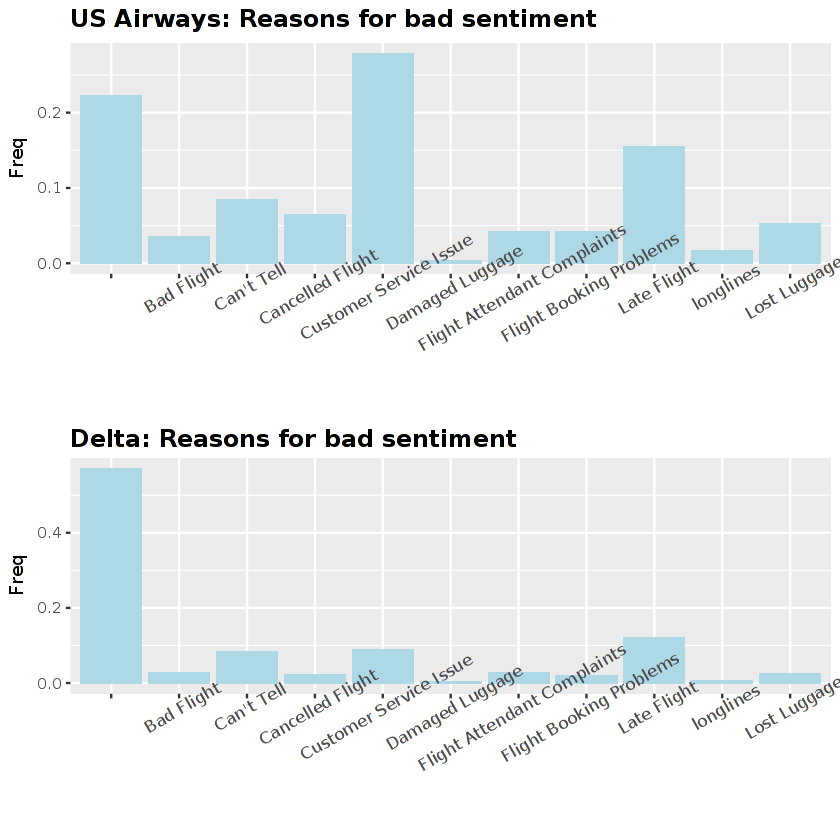

In [15]:
grid.arrange(g3, g4, ncol = 1, nrow = 2)

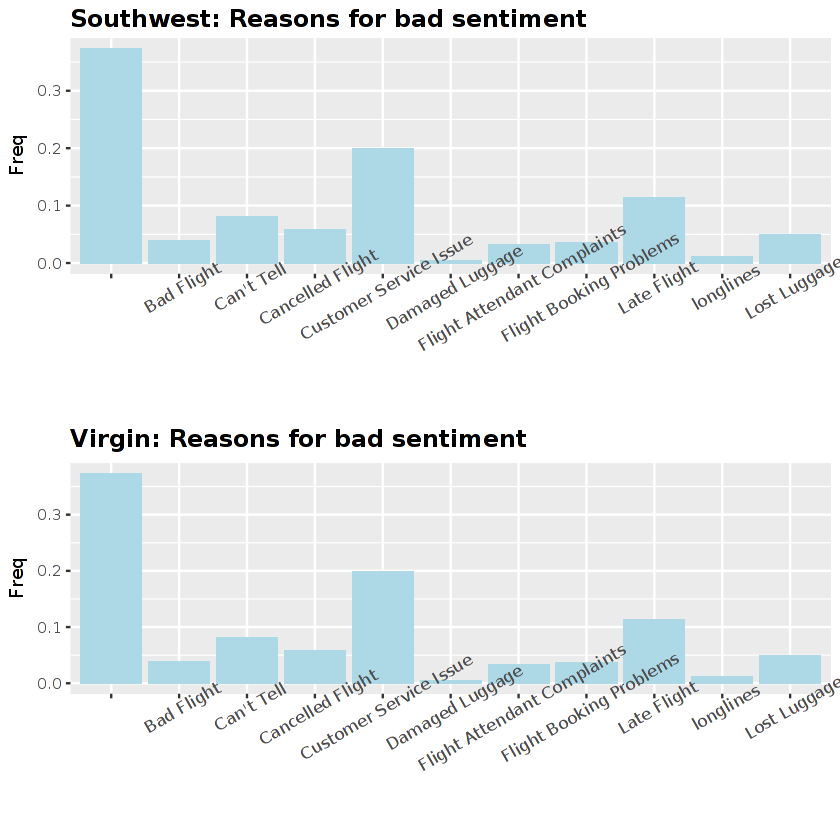

In [16]:
grid.arrange(g5, g6, ncol = 1, nrow = 2)

From the plots we can see that for American airlines, negative sentiment is elicited mostly by Customer Service related Issues, and not so much for Late Flights. We could speculate that American flights depart mostly on time. The same seems to be true for Virgin and Southwest airlines. Virgin seems to have a sub-optimal booking system, as booking problems is the second reason eliciting bad sentiment in tweets.

US Airways and United have a number of complaints for Customer Service Issues followed closely by Late Flights.

On the contrary, for Delta most of the complaints are due to late flights. We could then speculate that Delta has problems with having their flights depart on time, yet they show a perhaps better customer service.

## Exploratory data analysis: columns containing NAs (no data)

In [17]:
# fill with NA cells in dataframe containing "", " " or the string NA
data = as.data.frame(apply(data, 2, function(x) gsub("^$|^ $", NA, x)))

In [18]:
# check which columns contain NA and how many
apply(data, 2, function(x) sum(is.na(x)))

tweet_id            airline_sentiment 
                           0                            0 
airline_sentiment_confidence               negativereason 
                           0                         5462 
   negativereason_confidence                      airline 
                        4118                            0 
      airline_sentiment_gold                         name 
                       14600                            0 
         negativereason_gold                retweet_count 
                       14608                            0 
                        text                  tweet_coord 
                           0                        13621 
               tweet_created               tweet_location 
                           0                         4733 
               user_timezone 
                        4820

Airline_sentiment_gold and nevative_reason_gold are mostly empty columns, i.e., they contain no information.

## Re-tweet analysis

In [19]:
table(data$retweet_count)


    0     1     2     3     4     5     6     7     8     9    11    15    18 
13873   640    66    22    17     5     3     3     1     1     1     1     1 
   22    28    31    32    44 
    2     1     1     1     1 

We can see tht most of the tweets are actually not retweeted. A very tiny fraction of them (640/14640) are tweeted only once. However, 4 tweets have been retweeted 44, 32, 31 and 28 times. Let's have a look and see why they say.

In [20]:
as.character(subset(data, retweet_count ==44)$text);
print(" ")
as.character(subset(data, retweet_count ==32)$text);
print(" ")
as.character(subset(data, retweet_count ==31)$text);
print(" ")
as.character(subset(data, retweet_count ==28)$text)

[1] "@USAirways 5 hr flight delay and a delay when we land . Is that even real life ? Get me off this plane , I wanna go home 👠👠👠 (3 heel clicks)"

[1] " "


[1] "@USAirways of course never again tho . Thanks for tweetin ur concern but not Doin anythin to fix what happened. I'll choose wiser next time"

[1] " "


[1] "STOP. USING.THIS.WORD. IF. YOU'RE. A. COMPANY. RT @JetBlue: Our fleet's on fleek. http://t.co/Fd2TNYcTrB"

[1] " "


[1] "@USAirways with this livery back in the day. http://t.co/EEqWVAMmiy"

The first 2 tweets show clear anger directed to US Airways. There was a substantial delay in the flight according to the first tweet, however the reason  is not clear in the second tweet. The third tweet is directed towards Delta, although it is not clear what the message is. The curator of the dataset identified this tweet as negative, perhaps she followed the link attached for more information. I can't tell what the sentiment is from those lines.
Finally, the fourth tweet is also targeted towards US Airways, the sentiment is neutral according to the curator of the dataset. I can't say what it was referring to from those lines.

## Tweet location exploration

In [21]:
head(unique(data$tweet_location), 50)

[1] <NA>                          Lets Play                    
 [3] San Francisco CA              Los Angeles                  
 [5] San Diego                     1/1 loner squad              
 [7] NYC                           San Francisco, CA            
 [9] palo alto, ca                 west covina                  
[11] this place called NYC         Somewhere celebrating life.  
[13] Boston | Waltham              Boston, MA                   
[15] 714                           San Mateo, CA & Las Vegas, NV
[17] Brooklyn                      California, San Francisco    
[19] Washington DC                 Texas                        
[21] Worldwide                     Central Texas                
[23] i'm creating a monster        Iowa City                    
[25] Georgia                       Turks and caicos             
[27] Oakland via Midwest           New York, NY                 
[29] Northern Virginia             Los Angeles / Atlanta        
[31] new york, new york            brooklyn, Ny                 
[33] Bali, Republic of Indonesia   UK, USA.                     
[35] Gold Coast, Australia         Stockton, CA                 
[37] Twin Cities, Minn.            USA                          
[39] next city                     SF ↔ NY                      
[41] New York + Panama             London, England              
[43] Floridian from Cincinnati     Dallas, Texas                
[45] Seattle, WA                   Lower Pacific Heights, SF, CA
[47] Chicago                       Los Cabos,Mexico             
[49] Los Angeles, CA               Austin, TX                   
3081 Levels:   || san antonio, texas|| ... サマセット、ニュージャージー州

It would have been useful to know the location of the tweets to determine if certain areas are more prone to tweet, or to have one sentiment or the other. However, different users type different things for location, for example "1/1 loner squad" or "i'am creating a monster", which makes this variable a bit useless.
    
## Tweet timezone study

In [22]:
timezone = as.data.frame(prop.table(table(data$user_timezone)))
colnames(timezone) = c('timezone', 'Frequency')
timezone = timezone[order(timezone$Frequency, decreasing = TRUE),]
dim(timezone)
head(timezone, 10)

[1] 85  2

,timezone,Frequency
31,Eastern Time (US & Canada),0.38126273
28,Central Time (US & Canada),0.19663951
63,Pacific Time (US & Canada),0.12301426
68,Quito,0.07515275
13,Atlantic Time (Canada),0.05061100
58,Mountain Time (US & Canada),0.03757637
11,Arizona,0.02331976
50,London,0.01985743
3,Alaska,0.01099796
77,Sydney,0.01089613


We find the great majority of tweets coming from Eastern time zone and almost all the tweets come from US & Canada time zone.

## Location of tweets: Visualisation on maps

In [23]:
location = data$tweet_coord
location = location[complete.cases(location)] # remove NAs
location = as.data.frame(location)
location$count =  1 # add a count column filled with 1s
location$location = as.character(location$location)
#remove duplicate locations and count the times they appeared, write the count in the count column
location = aggregate(count~location, data = location, FUN = sum)
location = location[-5,] # removes row containing coords [0,0] which are probably wrong
coords = strsplit(location$location, ',') 

# separate lat and long from location
lat = NULL
long = NULL
for (i in 1:length(coords)) {
    lat = c(lat, substring(coords[[i]][1], 2)) # removes first character which is [
    long = c(long, coords[[i]][2]) 
}

location$lat = lat
location$long = long

# remove ]
location$long = substr(location$long, 1, nchar(location$long)-1)

location$lat = as.numeric(location$lat)
location$long = as.numeric(location$long)
   
head(location)
print('')
dim(location)

,location,count,lat,long
1,"[-33.87144962, 151.20821275]",1,-33.871450,151.20821
2,"[-37.8536992, 145.1106176]",1,-37.853699,145.11062
3,"[-38.0269936, 145.2110041]",1,-38.026994,145.21100
4,"[-38.0271635, 145.2112317]",1,-38.027164,145.21123
6,"[1.3523078, 103.8637764]",1,1.352308,103.86378
7,"[10.42269832, -75.54540857]",1,10.422698,-75.54541


[1] ""


[1] 831   4

Loading required package: maps
Warning message:
“Removed 56 rows containing missing values (geom_point).”

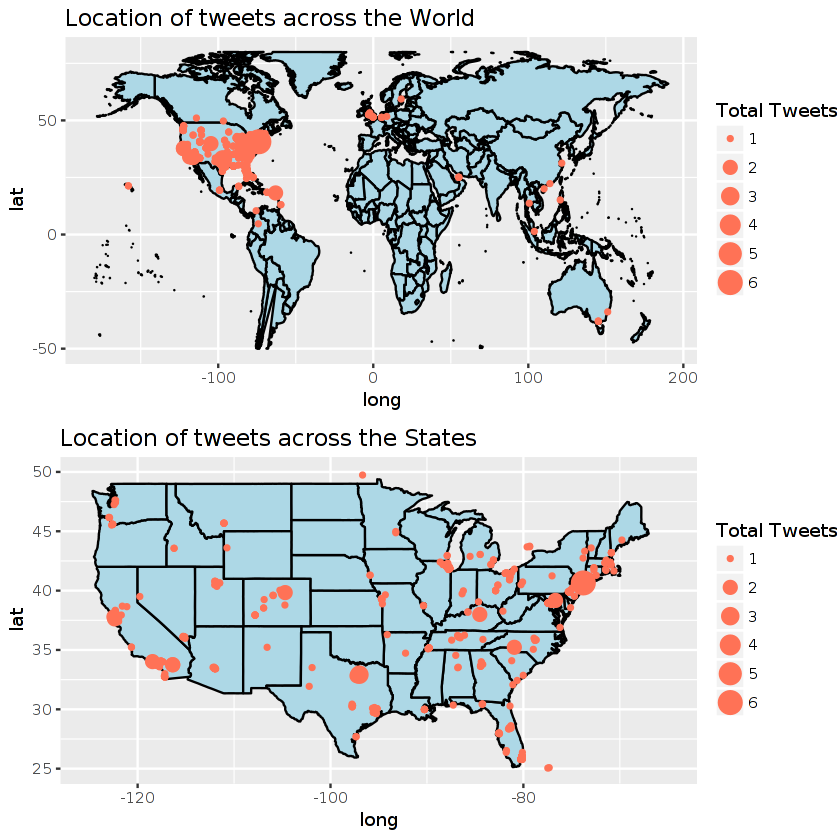

In [24]:
require(maps)
world_map <- map_data("world")
g1 = ggplot()
g1 = g1 + geom_polygon(data=world_map, aes(x=long, y=lat, group = group), colour="black", fill = 'lightblue') + 
ggtitle("Location of tweets across the World")
g1 = g1 + geom_point(data=location, aes(x=long, y=lat, size = count), color="coral1") + scale_size(name="Total Tweets")
g1 = g1 + ylim(-50, 80)

states <- map_data("state")
g2 = ggplot()
g2 =g2 + geom_polygon(data=states, aes(x=long, y=lat, group = group), colour="black", fill = 'lightblue') + 
ggtitle("Location of tweets across the States")
g2 = g2 + geom_point(data=location, aes(x=long, y=lat, size = count), color="coral1") + scale_size(name="Total Tweets")
g2 = g2 + xlim(-125, -65) + ylim(25, 50)
#grid.arrange(g, ncol=1, nrow = 2)

grid.arrange(g1, g2, ncol=1, nrow = 2)

## Conclusions
We conducted exploratory data analysis to understand and get familiar with the data at hand. We have found that:

* Most tweets have negative sentiment (>60%).
* Most tweets are targeted towards United airlines, followed by American and US Airways.
* Virgin receives very few tweets.
* Most of the tweets targeted towards American, United and US Airways contain negative sentiment.
* Tweets targeted towards Delta, Virgin and Southwest containg roughly same proportion of negative, neutral and positive sentiment.
* Main reasons for negative sentiment are Customer Service Issues and Late Flights.
* Negative sentiment tweets towards Delta are based mostly on alte flights and not so much on Customer Service Issues as for the rest of the airlines.
* Most tweets are not retweeted.
* Most tweets come from US & Canada time zone.
* Most tweets come from the States.

In part 2 of these studies, I will evaluate the text of the tweets to extract some common themes and get a deeper understanding of the reasons for negative AND positive sentiment.